# Clustering with Sklearn

In this notebook we'll practice clustering algorithms with Scikit-Learn.

## Data sets

We'll use the following datasets:
* Some sample data
* [Iris](http://archive.ics.uci.edu/ml/datasets/Iris)
* [Old Faithful eruption data](http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat): eruption times and wait times between eruptions

There are many [clustering data sets](https://archive.ics.uci.edu/ml/datasets.html?format=&task=clu&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table) you can use for practice!


In [11]:
%matplotlib inline
from collections import Counter
import random

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN

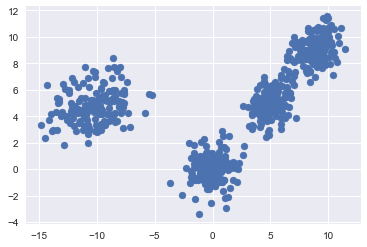

In [12]:
## Create some synthetic data

from scipy.stats import multivariate_normal
data = []
dist = multivariate_normal(mean=[0,0], cov=[[1,0],[0,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[5,5], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[9,9], cov=[[1,0.5],[0.2,1]])
for i in range(150):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[-10,5], cov=[[3,0.5],[0.2,2]])
for i in range(150):
    data.append(dist.rvs())    
    
df = pd.DataFrame(data, columns=["x", "y"])
df.head()
plt.scatter(df['x'], df['y'])
plt.show()

In [13]:
def annulus(inner_radius, outer_radius, n=30, color='b'):
    """Generate n points with class `color` between the inner radius and the outer radius."""
    data = []
    diff = outer_radius - inner_radius
    for _ in range(n):
        # Pick an angle and radius
        angle = 2 * np.pi * random.random()
        r = inner_radius + diff * random.random()
        x = r * np.cos(angle)
        y = r * np.sin(angle)
        data.append((x, y))
    # Return a data frame for convenience
    xs, ys = zip(*data)
    df = pd.DataFrame()
    df["x"] = xs
    df["y"] = ys
    df["color"] = color
    return df

df1 = annulus(2, 6, 200, color='r')
df2 = annulus(8, 10, 300, color='b')
df_circ = pd.concat([df1, df2])

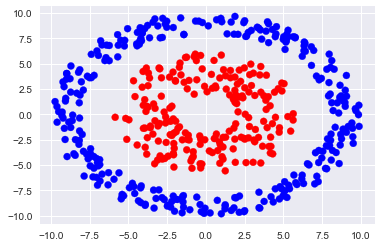

In [14]:
plt.scatter(df_circ['x'], df_circ['y'], c=df_circ['color'])
plt.show()

## K-Means with sklearn

In [15]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2) # we instantiate our k-means
X = df[["x", "y"]] # feed it our data
estimator.fit(X) # fit the estimator
# Clusters are given in the labels_ attribute
labels = estimator.labels_ #we can print properties from the model
print labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

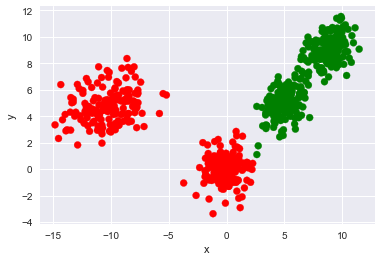

In [16]:
# Plot the data

def set_colors(labels, colors='rgbykcm'):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Let's try it with `k=4` this time.

Counter({2: 151, 1: 150, 3: 150, 0: 149})


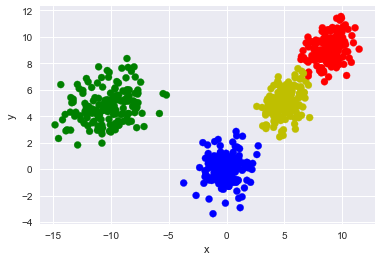

In [17]:
estimator = KMeans(n_clusters=4)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Let's try the circular data. Kmeans doesn't work as well as before.

Counter({1: 264, 0: 236})


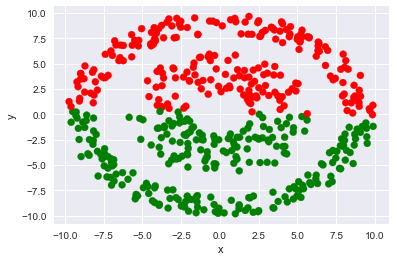

In [18]:
estimator = KMeans(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()


Ouch! No so great on this dataset. Now let's try some real data.

In [38]:
of_df = pd.read_csv("faithful.csv")
of_df.head()

,Index,eruption_time,wait_time
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


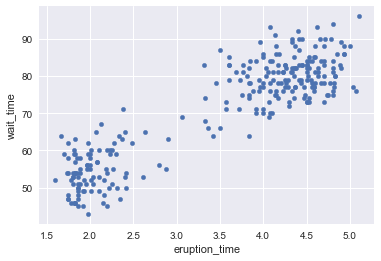

In [39]:
of_df.plot.scatter(x='eruption_time', y='wait_time')
plt.show()

In [40]:
# Fit a k-means estimator
estimator = KMeans(n_clusters=2)
X = of_df[["eruption_time", "wait_time"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

Counter({0: 172, 1: 100})


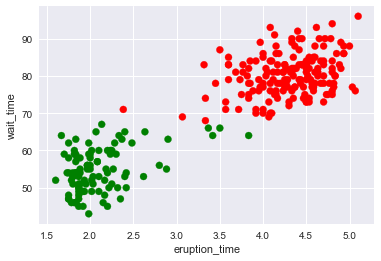

In [41]:
# Plot the data

colors = set_colors(labels)
plt.scatter(of_df["eruption_time"], of_df["wait_time"], c=colors)
plt.xlabel("eruption_time")
plt.ylabel("wait_time")
plt.show()

## Exercise: k-means

For the Iris dataset, fit and plot k-means models to:
* sepal_length and petal_length, for k=2 and k=3
* sepal_width and petal_width, for k=2 and k=3

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

After: Check out the 3D-example [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_iris.html)

In [66]:
from sklearn import datasets

In [110]:
iris = datasets.load_iris()

In [111]:
feature_names = iris.feature_names
feature = iris.data

In [112]:
iris_df = pd.DataFrame(feature,columns=feature_names)

In [113]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [114]:
X = iris.data
y = iris.target

In [117]:
df_target = pd.DataFrame(iris.target)

In [118]:
df_target.head()

,0
0,0
1,0
2,0
3,0
4,0


In [119]:
iris_df = iris_df.join(df_target)

In [120]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [123]:
iris_df.rename(columns={'sepal length (cm)':'sepal_length','sepal width (cm)':'sepal_width','petal length (cm)':'petal_length','petal width (cm)':'petal_width',0:'species'}, inplace=True)

In [124]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


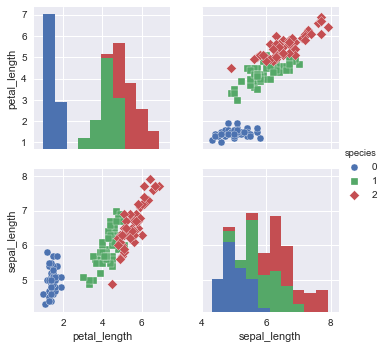

In [128]:
sns.pairplot(iris_df, vars=['petal_length', 'sepal_length'], hue='species', markers=["o", "s", "D"])
plt.show()

In [131]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species           int64
dtype: object

In [193]:
from sklearn.cluster import KMeans, DBSCAN

#For the Iris dataset, fit and plot k-means models to: 
#sepal_length and petal_length, for k=2 and k=3
#Let's try 3 clusters this time

X2 = iris_df[['sepal_length','petal_length']]
y2 = iris_df['species']

km = KMeans(n_clusters=3, init='random', max_iter=100, n_init=1, verbose=1, random_state=42)
km.fit(X2)

km_labels = km.labels_
print Counter(km_labels)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 68.4576470385
start iteration
done sorting
end inner loop
Iteration 1, inertia 61.9541522438
start iteration
done sorting
end inner loop
Iteration 2, inertia 58.5919744392
start iteration
done sorting
end inner loop
Iteration 3, inertia 56.2683238457
start iteration
done sorting
end inner loop
Iteration 4, inertia 54.7366059757
start iteration
done sorting
end inner loop
Iteration 5, inertia 53.9939570136
start iteration
done sorting
end inner loop
Iteration 6, inertia 53.8305641409
start iteration
done sorting
end inner loop
Iteration 7, inertia 53.8013511931
start iteration
done sorting
end inner loop
Iteration 8, inertia 53.8013511931
center shift 0.000000e+00 within tolerance 1.886774e-04
Counter({0: 58, 1: 51, 2: 41})


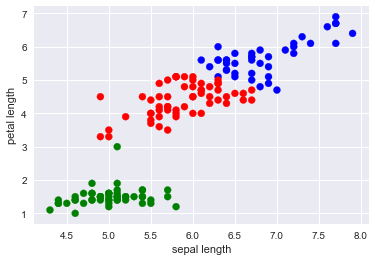

In [161]:
colors = set_colors(km_labels)
plt.scatter(iris_df['sepal_length'],iris_df['petal_length'], c=colors)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.show()

In [195]:
metrics.adjusted_rand_score(km_labels, y2)

0.69886276723480922

In [162]:
km = KMeans(n_clusters=2, init='random', max_iter=100, n_init=1, verbose=1, random_state=42)
km.fit(X2)

km_labels = km.labels_
print Counter(km_labels)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 113.137778642
start iteration
done sorting
end inner loop
Iteration 1, inertia 112.962627315
start iteration
done sorting
end inner loop
Iteration 2, inertia 112.962627315
center shift 0.000000e+00 within tolerance 1.886774e-04
Counter({0: 96, 1: 54})


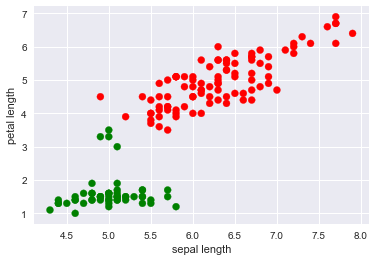

In [163]:
colors = set_colors(km_labels)
plt.scatter(iris_df['sepal_length'],iris_df['petal_length'], c=colors)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.show()

In [164]:
# rerun for sepal_width and petal_width, for k=2 and k=3
# with 2 this time

X3 = iris_df[['sepal_width','petal_width']]
y2 = iris_df['species']

km2 = KMeans(n_clusters=2, init='random', max_iter=100, n_init=1, verbose=1, random_state=42)
km2.fit(X3)

km2_labels = km2.labels_
print Counter(km2_labels)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37.4209416044
start iteration
done sorting
end inner loop
Iteration 1, inertia 36.501
start iteration
done sorting
end inner loop
Iteration 2, inertia 36.501
center shift 0.000000e+00 within tolerance 3.826411e-05
Counter({0: 100, 1: 50})


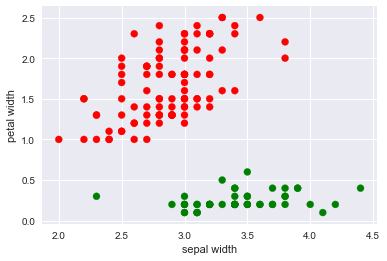

In [165]:
colors = set_colors(km2_labels)
plt.scatter(iris_df['sepal_width'],iris_df['petal_width'], c=colors)
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()

In [166]:
#This time with 3 clusters

km2 = KMeans(n_clusters=3, init='random', max_iter=100, n_init=1, verbose=1, random_state=42)
km2.fit(X3)

km2_labels = km2.labels_
print Counter(km2_labels)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 22.6670646174
start iteration
done sorting
end inner loop
Iteration 1, inertia 21.0061313131
start iteration
done sorting
end inner loop
Iteration 2, inertia 20.7878814103
start iteration
done sorting
end inner loop
Iteration 3, inertia 20.7170898312
start iteration
done sorting
end inner loop
Iteration 4, inertia 20.7170898312
center shift 0.000000e+00 within tolerance 3.826411e-05
Counter({0: 53, 1: 49, 2: 48})


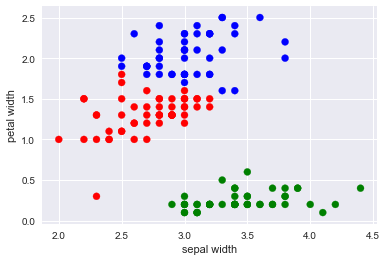

In [167]:
colors = set_colors(km2_labels)
plt.scatter(iris_df['sepal_width'],iris_df['petal_width'], c=colors)
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()

In [192]:
metrics.adjusted_rand_score(km2_labels, y2)

0.79717470561917547

## DBSCAN

Counter({0: 150})


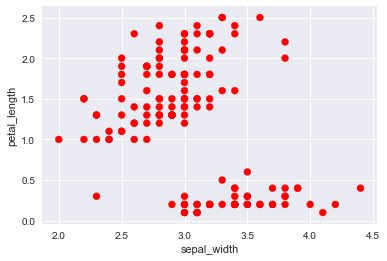

In [173]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=10)
estimator.fit(X3)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris_df['sepal_width'],iris_df['petal_width'], c=colors)
plt.xlabel("sepal_width")
plt.ylabel("petal_length")
plt.show()

Counter({1: 299, 0: 148, 2: 143, -1: 10})


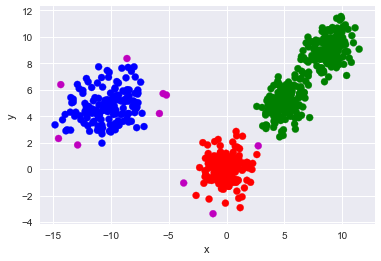

In [174]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1.3, min_samples=11)
X = df[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df['x'], df['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Counter({1: 300, 0: 200})


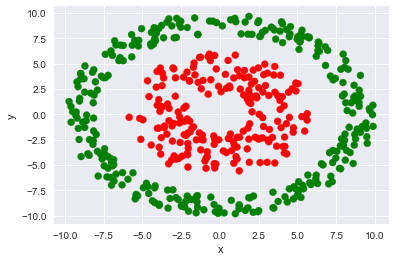

In [175]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=2, min_samples=10)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Much better than k-means on this dataset! Let's try to cook up something that DBSCAN doesn't work as well on.

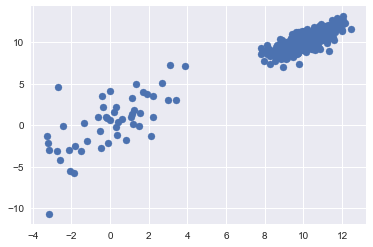

In [176]:
## Create some synthetic data

data = []
dist = multivariate_normal(mean=[0,0], cov=[[6,12],[1,6]])
for i in range(50):
    data.append(dist.rvs())
dist = multivariate_normal(mean=[10,10], cov=[[1,1.1],[0.2,0.6]])
for i in range(400):
    data.append(dist.rvs())    
    
df2 = pd.DataFrame(data, columns=["x", "y"])
df2.head()
plt.scatter(df2['x'], df2['y'])
plt.show()

Counter({0: 372, -1: 78})


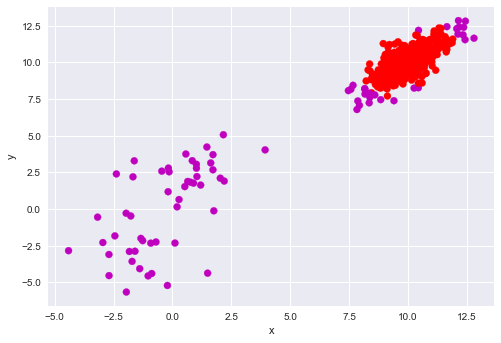

In [67]:
# Fit a DBSCAN estimator
estimator = DBSCAN(eps=0.5, min_samples=10)
X = df2[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df2['x'], df2['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Exercise: DBSCAN

For the Iris dataset, fit and plot dbscan models to:
* sepal_length and petal_length
* sepal_width and petal_width

Bonus: [Compare](http://scikit-learn.org/stable/modules/clustering.html#adjusted-rand-index) your classifications to the known species. How well do the labels match up?

In [188]:
from sklearn import metrics

Counter({1: 100, 0: 50})


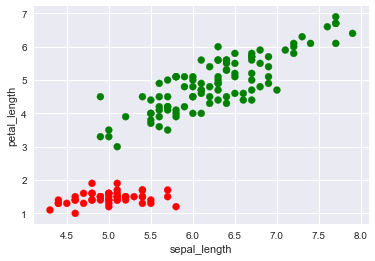

In [190]:
X4 = iris_df[['sepal_length','petal_length']]

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1, min_samples=10)
estimator.fit(X4)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris_df['sepal_length'],iris_df['petal_length'], c=colors)
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.show()

In [191]:
metrics.adjusted_rand_score(y2,labels)

0.56811594202898552

Counter({0: 150})


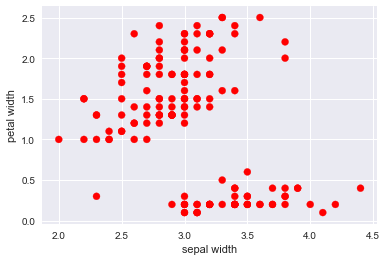

In [187]:
X5 = iris_df[['sepal_width','petal_width']]

# Fit a DBSCAN estimator
estimator = DBSCAN(eps=1.0, min_samples=10)
estimator.fit(X5)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris_df['sepal_width'],iris_df['petal_width'], c=colors)
plt.xlabel("sepal width")
plt.ylabel("petal width")
plt.show()

In [189]:
metrics.adjusted_rand_score(y2,labels)

0.0

## Hierarchical Clustering

Counter({0: 60, 1: 50, 2: 28, 3: 12})


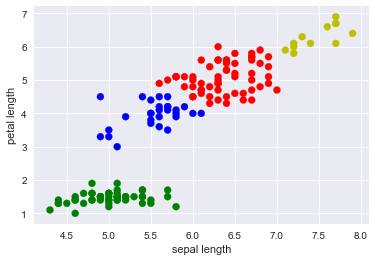

In [177]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=4)
X = iris_df[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(iris_df['sepal_length'], iris_df['petal_length'], c=colors)
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.show()

Counter({1: 259, 0: 241})


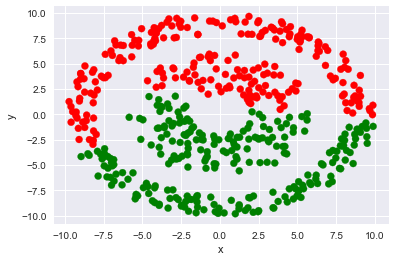

In [178]:
# Hierarchical: Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit an estimator
estimator = AgglomerativeClustering(n_clusters=2)
X = df_circ[["x", "y"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

colors = set_colors(labels)
plt.scatter(df_circ['x'], df_circ['y'], c=colors)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [213]:
## Silhouette Coefficient

from sklearn import metrics

estimator = KMeans(n_clusters=3)
X = iris_df[["sepal_length", "petal_length"]]
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

print metrics.silhouette_score(X, labels, metric='euclidean')

Counter({2: 58, 1: 51, 0: 41})
0.589061247376


In [222]:
estimator = DBSCAN(eps=0.4, min_samples=10)
estimator.fit(X)
# Clusters are given in the labels_ attribute
labels = estimator.labels_
print Counter(labels)

print metrics.silhouette_score(X5, labels, metric='euclidean')

Counter({1: 85, 0: 50, -1: 15})
0.34488644306


Bigger is better, so k-means was a better clustering algorithm on this data set.

# Visualising Silhouette Analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

It should be noted that if ground truth is known, silhouette score on its own may not be a very good barometer of accuracy if there is not good separation in the data between clusters of 'like' datapoints.  We can see this in the examples from the iris dataset below.

For n_clusters = 2 The average silhouette_score is : 0.709682558072


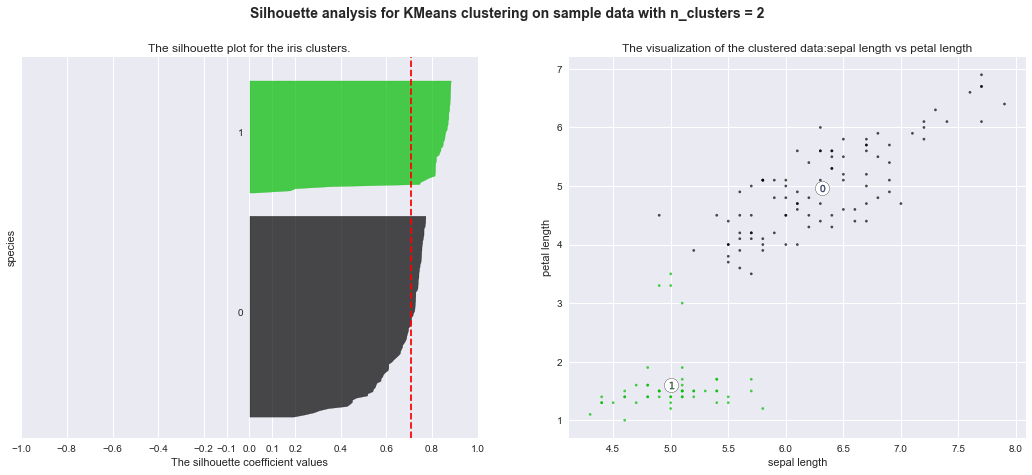

For n_clusters = 3 The average silhouette_score is : 0.589061247376


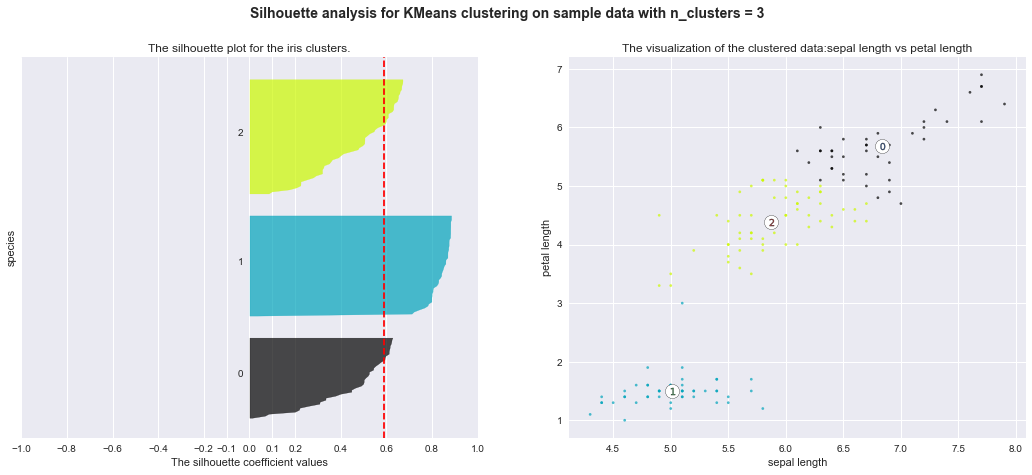

For n_clusters = 4 The average silhouette_score is : 0.56456252597


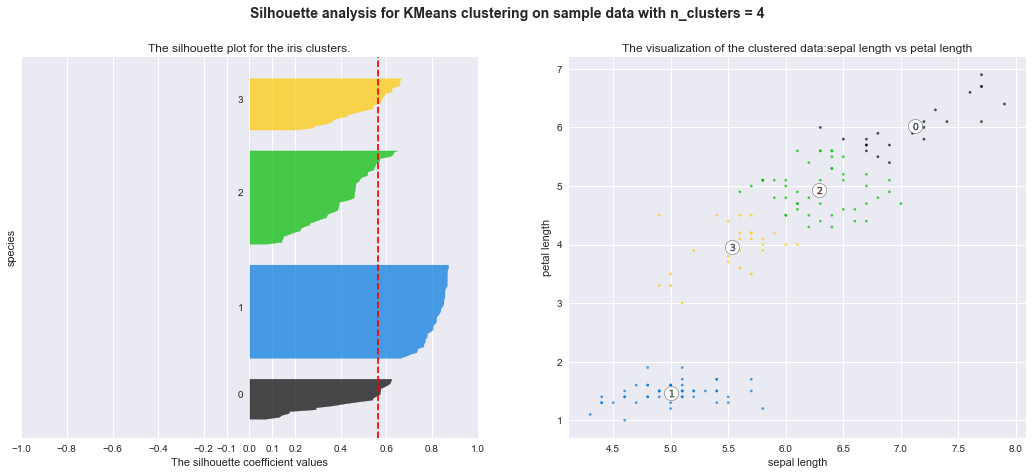

For n_clusters = 5 The average silhouette_score is : 0.557796497824


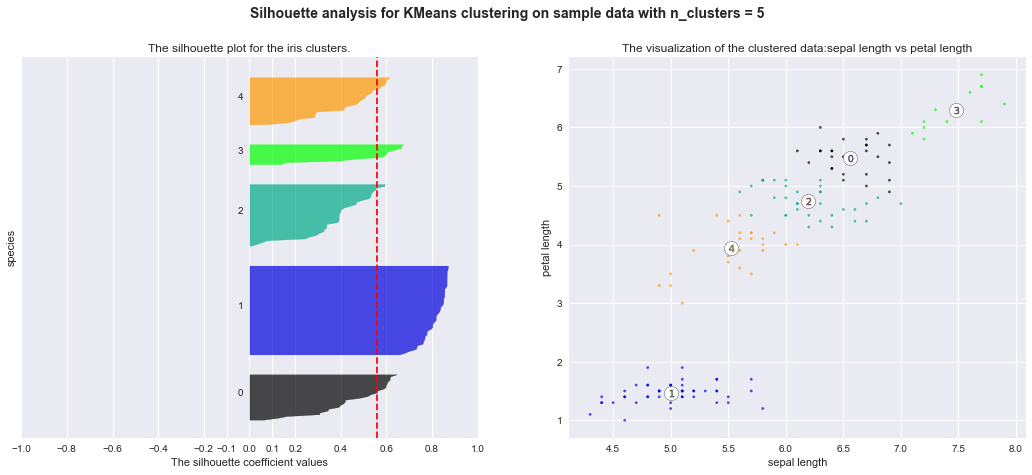

For n_clusters = 6 The average silhouette_score is : 0.411674212093


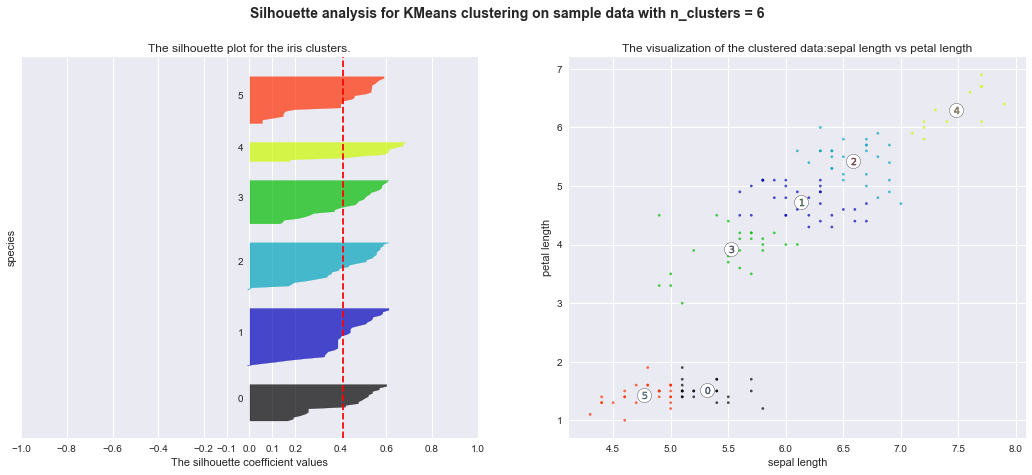

In [227]:
# Plotting the Silhouette Coefficient for the Iris Data.  First: sepal length vs petal length

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = iris_df[["sepal_length", "petal_length"]]

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    #The first subplot is the silhouette plot
    #The silhouette coeffficient can range from -1,1
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)
    
    ax1.set_ylim([0,len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print "For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg
        
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the iris clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("species")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.8,-0.6,-0.4,-0.2,-0.1, 0, 0.1,0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_df['sepal_length'], iris_df['petal_length'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data:sepal length vs petal length")
    ax2.set_xlabel("sepal length")
    ax2.set_ylabel("petal length")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

For n_clusters = 2 The average silhouette_score is : 0.626566544724


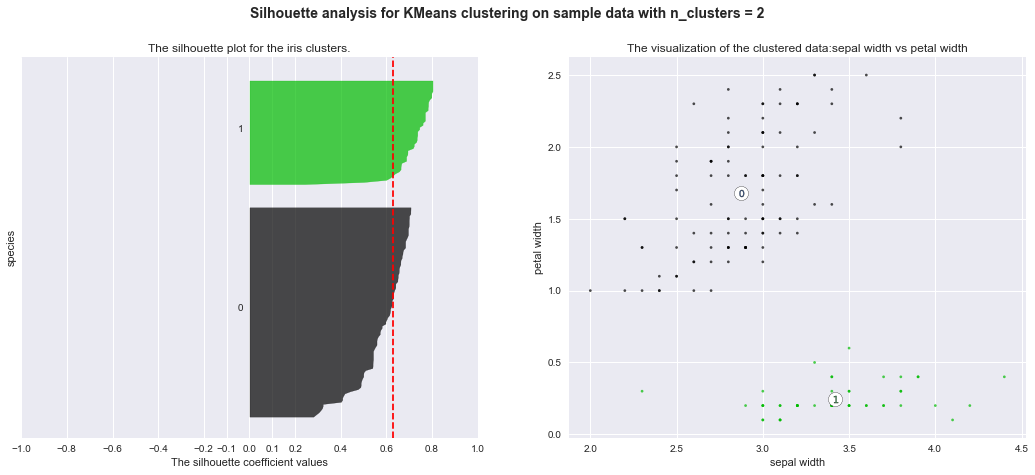

For n_clusters = 3 The average silhouette_score is : 0.527862995293


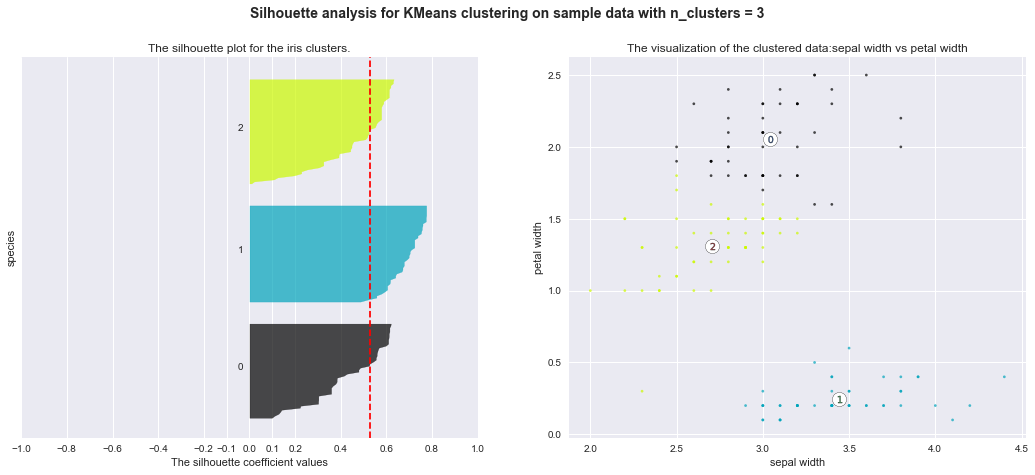

For n_clusters = 4 The average silhouette_score is : 0.490183710444


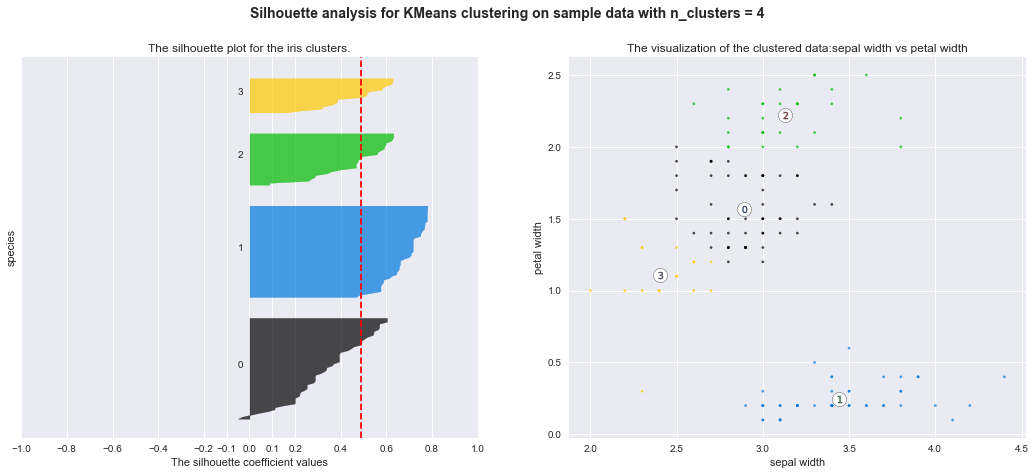

For n_clusters = 5 The average silhouette_score is : 0.438481964481


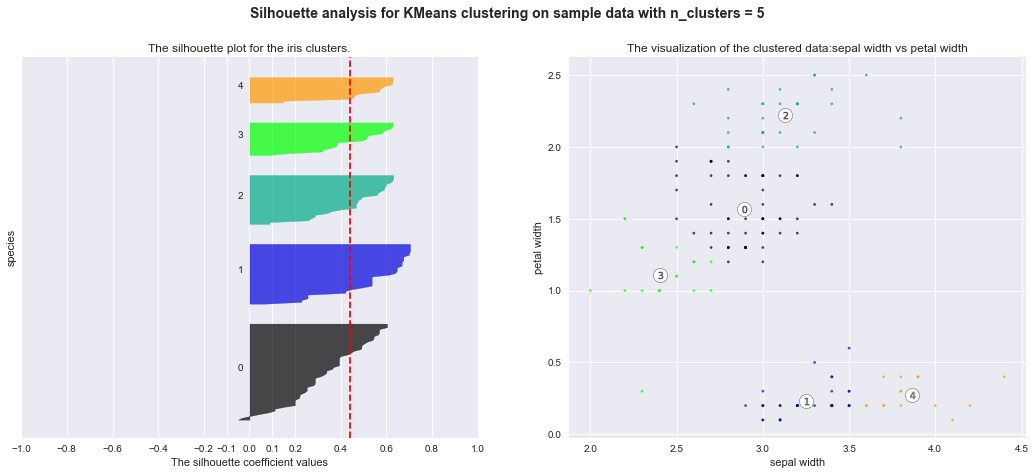

For n_clusters = 6 The average silhouette_score is : 0.443478203922


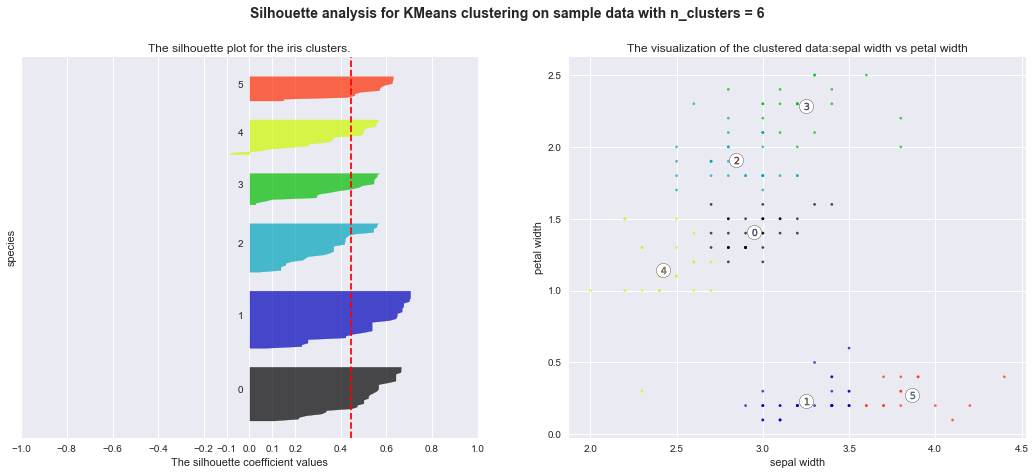

In [228]:
# Plotting the Silhouette Coefficient for the Iris Data: now sepal width vs petal width

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = iris_df[["sepal_width", "petal_width"]]

range_n_clusters = [2,3,4,5,6]

for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18,7)
    
    #The first subplot is the silhouette plot
    #The silhouette coeffficient can range from -1,1
    ax1.set_xlim(-1,1)
    ax1.set_ylim(-1,1)
    
    ax1.set_ylim([0,len(X) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, cluster_labels)
    print "For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg
        
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the iris clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("species")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-1,-0.8,-0.6,-0.4,-0.2,-0.1, 0, 0.1,0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(iris_df['sepal_width'], iris_df['petal_width'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data:sepal width vs petal width")
    ax2.set_xlabel("sepal width")
    ax2.set_ylabel("petal width")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()